# Day 4 作業

## [作業目標]
* 透過以下的插值演算法來放大與縮小 Lena 圖(放大與縮小4倍)，並比較各個演算法的時間差異：

    1. Inter nearest interpolation
    2. Inter linear interpolation
    3. Inter area interpolation
    4. Inter cubic interpolation
    5. Inter lanczos4 interpolation

## [作業重點]
* 熟悉 OpenCV 的 resize 函數
* 學會使用 time 模組來計算程式運行時間
* 觀察圖片的變化

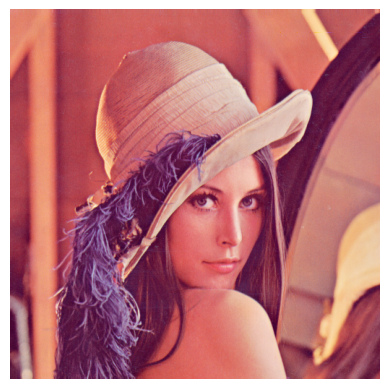

In [4]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

img = cv2.imread('./lena.png')

# cv2 預設 color space 是 BGR，但 matplotlib，
# 顯示是以 RGB 來顯示，故需要做順序的調整
plt.imshow(img[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

# 進行放大的比較

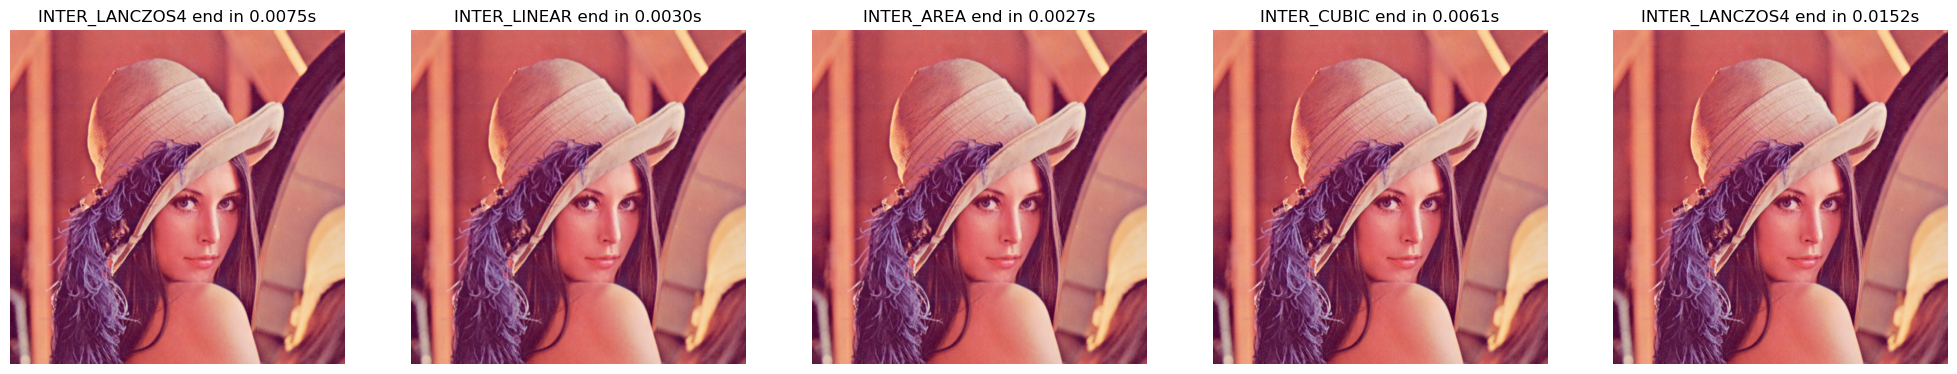

In [5]:
# 方便顯示與進行縮放
interpolation_lst = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_AREA, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]
interpolation_name = ['INTER_LANCZOS4', 'INTER_LINEAR', 'INTER_AREA', 'INTER_CUBIC', 'INTER_LANCZOS4']

# 定義欲放大與縮小的尺寸
small_length, big_length = int(img.shape[0] / 4), int(4 * img.shape[0])

# 定義作圖版面大小
plt.figure(figsize = (25, 5))

# 開始進行5種插值法的比較
for i in range(len(interpolation_lst)):
    start = time.time() # 按下碼表計時
    tmp = cv2.resize(img, (big_length, big_length), interpolation = interpolation_lst[i])
    end = time.time() # 結束計時
    
    # 開始做圖
    plt.subplot(1, 5, i + 1, title = '{} end in {:.4f}s'.format(interpolation_name[i], end - start))
    plt.imshow(tmp[:, :, [2, 1, 0]])
    plt.axis('off')

plt.show()

# 進行縮小的比較

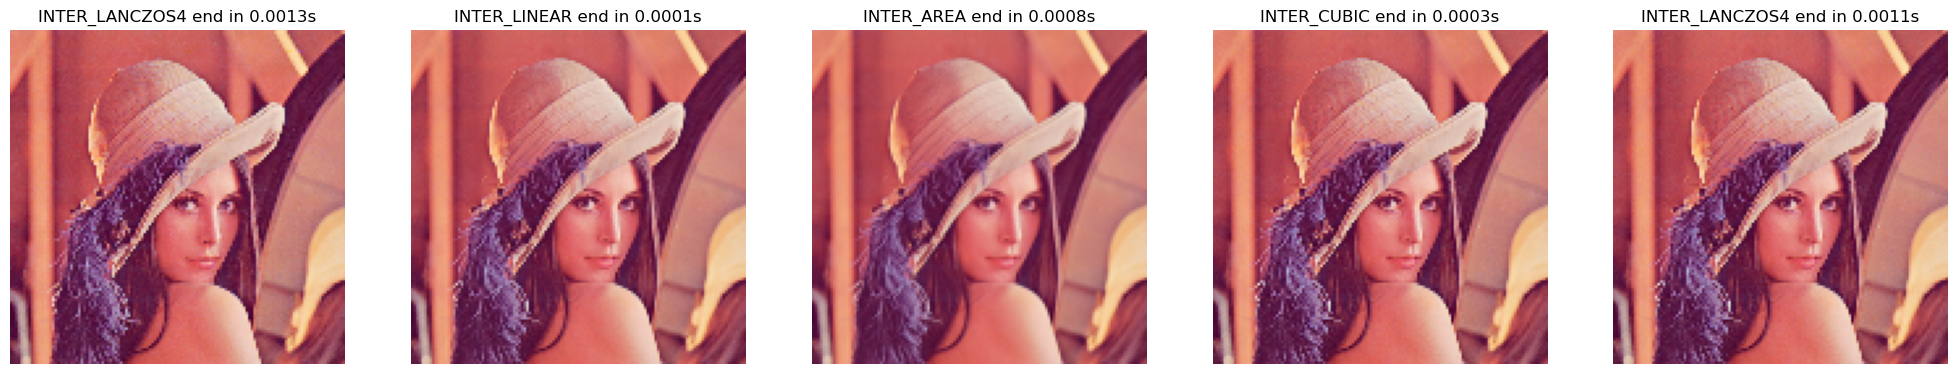

In [6]:
plt.figure(figsize = (25, 5))

for i in range(len(interpolation_lst)):
    start = time.time()
    tmp = cv2.resize(img, (small_length, small_length), interpolation = interpolation_lst[i])
    end = time.time()
    plt.subplot(1, 5, i + 1, title = '{} end in {:.4f}s'.format(interpolation_name[i], end - start))
    plt.imshow(tmp[:, :, [2, 1, 0]])
    plt.axis('off')

plt.show()